In [2]:
pip install sounddevice       #첨 실행할때만 하고 나중엔 지우셈

In [93]:
import numpy as np
import math
import sounddevice as sd
from  scipy.io import wavfile

v_rate, v_data = wavfile.read('사랑할수록 (화생방실 클레오파트라).wav')    #rate와 파형 리스트 각각 반환해줌

if(len(v_data.shape)>1):                            # 양쪽 다른 스테레오 사운드면 N*2 행렬로 나와서 걍 한쪽 버려버림. 평균때리면 ㅈ되더라?
        v_data=np.array(v_data[:,1])

#sd.play(v_data, v_rate)     

t = np.arange(0, 1, 1/v_rate)                  # Time array contains range of [0:1]
                                               # unit time: 1/v_rate
sampleLength = np.size(v_data)                 # 노래 파형 리스트 크기 = 샘플 개수
interval = 2000                                # 음 최소단위 샘플 몇 칸으로 할건지
numInterval = math.floor(sampleLength/interval)  # 노래 동안 인터벌 수, 저거 정수 아닐까봐 내림함

In [89]:
freqMid=[261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99, 392.00, 415.30, 440.00, 466.16, 493.88]
freqNote=np.empty(84)


for i in range(84):
    freqNote[i]=freqMid[i%12]*pow(2, divmod(i,12)[0]-3)        # 옥타브 7개, 그중 가운데가 표준 음
            
freqNote

array([  32.70375,   34.6475 ,   36.7075 ,   38.89125,   41.20375,
         43.65375,   46.24875,   49.     ,   51.9125 ,   55.     ,
         58.27   ,   61.735  ,   65.4075 ,   69.295  ,   73.415  ,
         77.7825 ,   82.4075 ,   87.3075 ,   92.4975 ,   98.     ,
        103.825  ,  110.     ,  116.54   ,  123.47   ,  130.815  ,
        138.59   ,  146.83   ,  155.565  ,  164.815  ,  174.615  ,
        184.995  ,  196.     ,  207.65   ,  220.     ,  233.08   ,
        246.94   ,  261.63   ,  277.18   ,  293.66   ,  311.13   ,
        329.63   ,  349.23   ,  369.99   ,  392.     ,  415.3    ,
        440.     ,  466.16   ,  493.88   ,  523.26   ,  554.36   ,
        587.32   ,  622.26   ,  659.26   ,  698.46   ,  739.98   ,
        784.     ,  830.6    ,  880.     ,  932.32   ,  987.76   ,
       1046.52   , 1108.72   , 1174.64   , 1244.52   , 1318.52   ,
       1396.92   , 1479.96   , 1568.     , 1661.2    , 1760.     ,
       1864.64   , 1975.52   , 2093.04   , 2217.44   , 2349.28

In [94]:
signal=np.empty((6,84,v_rate))
mixed=np.empty((84,v_rate))

#mixed[음계][옥타브]가 최종 피아노 파형 리스트이고 signal은 걍 사인파 합성한거

for i in range(6):
    for j in range(84):
            signal[i][j] = pow(2,-1*i)*np.sin(2*np.pi*i*freqNote[j]*t )
            mixed[j]+=signal[i][j]
            
sd.play(mixed[40],v_rate)

In [130]:
sheet = np.zeros((numInterval,84))   #이게 악보, 각 음계의 i 번째 interval에서 그 음의 amplitude를 저장할거임

In [103]:
#최소 자승법 ㄱ 한번 하고 작은 amplitude 음계들 버리고 한번 더
C=np.zeros((84,84))
for i in range(84):
    for j in range(84):
        for k in range(interval):
            C[i][j] += mixed[i][k]*mixed[j][k]
invC = np.linalg.inv(C)

In [131]:
for i in range(numInterval):
    d=np.zeros((84,1))
    for j in range(84):
        for k in range(interval):
            d[j] += v_data[i*interval+k]*mixed[j][k]
    sheet[i] = np.dot(invC,d).reshape(84)
    
sheet 

#사실 아직 작은 amplitude 음 버리는거 안함 근데 이거 확인되면 ㄱ 

array([[ 2.71495527e-01,  1.05694502e+03, -4.79907823e+02, ...,
        -8.51738653e+00, -1.12884221e+00,  8.71628977e-01],
       [-1.58944948e+03,  4.02884314e+03, -3.75426168e+03, ...,
        -8.35424348e+00, -6.66607329e+00, -5.36468768e+00],
       [ 1.12667253e+03, -2.41268309e+03,  1.81240756e+03, ...,
         3.68206265e+00,  3.46509903e+00,  4.76760327e+00],
       ...,
       [-3.68972444e+02,  1.17658675e+03, -1.18314706e+03, ...,
        -3.77357094e+00, -2.57550717e+00, -2.47928025e+00],
       [ 1.90112297e+03, -4.46573057e+03,  3.94648556e+03, ...,
         6.38959228e+00,  6.17512868e+00,  7.40004566e+00],
       [-1.42799726e+03,  3.98379972e+03, -3.85917762e+03, ...,
        -7.92684405e+00, -7.33881508e+00, -5.82129461e+00]])

In [179]:
a=[[1.1234,2.64532,3],[-1,-2,-3]]
b=np.zeros((2,3))
for i in range(2):
    b[i]=[0 if abs(j)<2 else 2*np.sign(j) for j in a[i]]


array([[ 0.,  2.,  2.],
       [ 0., -2., -2.]])

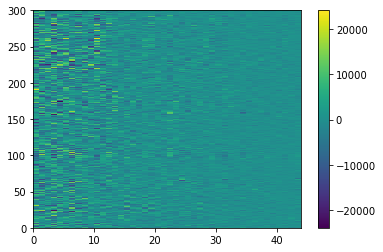

In [188]:
import matplotlib.pyplot as plt

plt.pcolor(sheet[3000:3300,40:])
plt.colorbar()
plt.show()

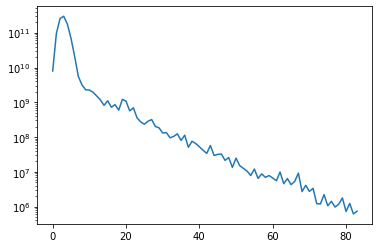

In [197]:
plt.plot(sheet.var(axis=0))
plt.yscale('log')
plt.show()

In [200]:
sheetImp = np.empty(np.shape(sheet))
for i in range(numInterval):
    sheetImp[i] = [0 if abs(j)<1000 else 3000*np.sign(j) for j in sheet[i]]
sheetImp

array([[    0.,  3000.,     0., ...,     0.,     0.,     0.],
       [-3000.,  3000., -3000., ...,     0.,     0.,     0.],
       [ 3000., -3000.,  3000., ...,     0.,     0.,     0.],
       ...,
       [    0.,  3000., -3000., ...,     0.,     0.,     0.],
       [ 3000., -3000.,  3000., ...,     0.,     0.,     0.],
       [-3000.,  3000., -3000., ...,     0.,     0.,     0.]])

In [ ]:
#이제 이거 다합쳐서 하나로 만들어야댐..

music=np.empty(interval*numInterval)
for i in range(numInterval):
    for j in range(84):
        for k in range(interval):
                music[i*interval+k]+=sheetImp[i][j]*mixed[j][k]

In [176]:
music

array([ 0.        , 12.16649332, 24.33016948, ..., 71.17847038,
       84.67261897, 98.39879348])

In [ ]:
#시각화 해야됨. 파이썬으로 안되면 이걸로 sheet 받아서 csv로 저장하고 딴 언어에서 할 생각도 하는 중

In [175]:
sd.play(music,v_rate)

In [172]:
#사랑할수록 (화생방실 클레오파트라).wav
sheetS=sheet
musicSoriginal=music

In [178]:
sheetSsim1=sheetImp
musicSsim1=music  

#sheetImp = np.empty(np.shape(sheet))
#for i in range(numInterval):
#    sheetImp[i] = [0 if abs(j)<1000 else j for j in sheet[i]]
#sheetImp